<a href="https://colab.research.google.com/github/nedokormysh/GB_Libraries_python_for_DS/blob/CourseProject/Libraries_python_DS_CourseWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подключение библиотек

In [505]:
# Основные библиотеки
import numpy as np
import pandas as pd
import random

from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [506]:
import warnings
warnings.filterwarnings('ignore')

In [507]:
!pip install catboost

In [508]:
# Метрика качества
from sklearn.metrics import r2_score as r2
from scipy.stats import mode

# Разделение датасета
from sklearn.model_selection import train_test_split, cross_val_score

from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

import xgboost as xgb
from sklearn.model_selection import KFold, GridSearchCV

In [509]:
import warnings
warnings.filterwarnings('ignore')

In [510]:
matplotlib.rcParams.update({'font.size': 14})

# **Загрузка, предобработка данных**

## Функция подсчёта метрик

In [511]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

## Загрузка данных

In [512]:
TRAIN_DATASET_PATH = 'https://raw.githubusercontent.com/nedokormysh/GB_Libraries_python_for_DS/CourseProject/train.csv'
TEST_DATASET_PATH = 'https://raw.githubusercontent.com/nedokormysh/GB_Libraries_python_for_DS/CourseProject/test.csv'
SAMPLE_DATASET_PATH = 'https://raw.githubusercontent.com/nedokormysh/GB_Libraries_python_for_DS/CourseProject/sample_submission.csv'

In [513]:
df_train = pd.read_csv(TRAIN_DATASET_PATH, sep=',')
df_test = pd.read_csv(TEST_DATASET_PATH)

In [514]:
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [515]:
df_train.columns.to_list()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price']

In [516]:
print(f'В обучающем датафрейме {df_train.shape[0]} строк и {df_train.shape[1]} столбцов')

В обучающем датафрейме 10000 строк и 20 столбцов


In [517]:
df_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B


In [518]:
print(f'В тестовом датафрейме {df_test.shape[0]} строк и {df_test.shape[1]} столбцов')

В тестовом датафрейме 5000 строк и 19 столбцов


### Разница в количестве признаков между train и test

Таким образом выполняется:

In [519]:
df_train.shape[1] - 1 == df_test.shape[1]

True

## Признаки нашего датасета

In [520]:
nl = '\n'
print(f"Названия столбцов в обучающем датафрейме {nl}{df_train.columns}")

Названия столбцов в обучающем датафрейме 
Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')


**Описание датасета**

* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
* **Social_1, Social_2, Social_3** - социальные показатели местности
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

Задача регрессии на прогнозирование стоимости домов. Метрикой является коэффициент корреляции R2.

Наблюдения - это строки. Признаки - столбцы.

##Приведение типов.

In [521]:
df_train.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [522]:
df_train['Id'] = df_train['Id'].astype(str)
df_train['DistrictId'] = df_train['DistrictId'].astype(str)
# df_train['Ecology_2'] = df_train['Ecology_2'].astype(str)
# df_train['Ecology_3'] = df_train['Ecology_3'].astype(str)
# df_train['Shops_2'] = df_train['Shops_2'].astype(str)

In [523]:
df_train.dtypes

Id                object
DistrictId        object
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [524]:
target = 'Price'
num_feat = list(df_train.select_dtypes(exclude='object').columns)
nom_feat = list(df_train.select_dtypes(include='object').columns)
print(f'Числовые признаки: {num_feat}')
print(f'Номинативные признаки: {nom_feat}')

Числовые признаки: ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Price']
Номинативные признаки: ['Id', 'DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']


# **EDA и очистка данных**

Дубликатов нет.

## Распределение целевой переменной

In [525]:
target_mean = round(df_train['Price'].mean(), 2)
target_median = round(df_train.Price.median(), 2)
target_mode = round(df_train.Price, -1).mode()[0]

In [526]:
print(f'Среднее значение целевой переменной = {target_mean}')
print(f'Медиана целевой переменной = {target_median}')
print(f'Мода целевой переменной = {target_mode}')

Среднее значение целевой переменной = 214138.86
Медиана целевой переменной = 192269.64
Мода целевой переменной = 181630.0


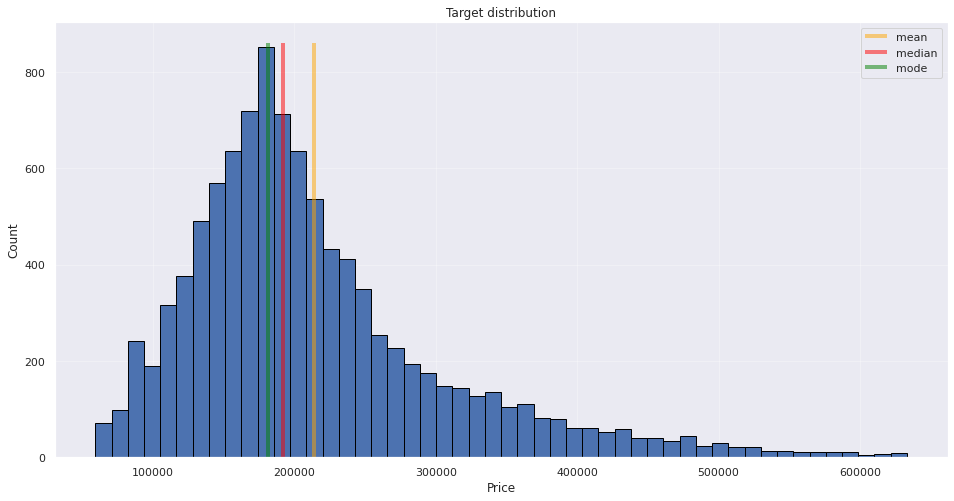

In [527]:
# Prepare Data
plt.figure(figsize = (16, 8))
y = df_train['Price']

# Draw plot

plt.hist(y, bins=50, edgecolor='black')
plt.vlines(target_mean, 0, 860, label='mean', linewidth=4, colors='orange', alpha=0.5)
plt.vlines(target_median, 0, 860, label='median', linewidth=4, colors='red', alpha=0.5)
plt.vlines(target_mode, 0, 860, label='mode', linewidth=4, colors='green', alpha=0.5)

# Decorations
plt.ylabel('Count')
plt.xlabel('Price')
plt.title('Target distribution')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

## Количественные признаки

In [528]:
df_train.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


## Корреляция

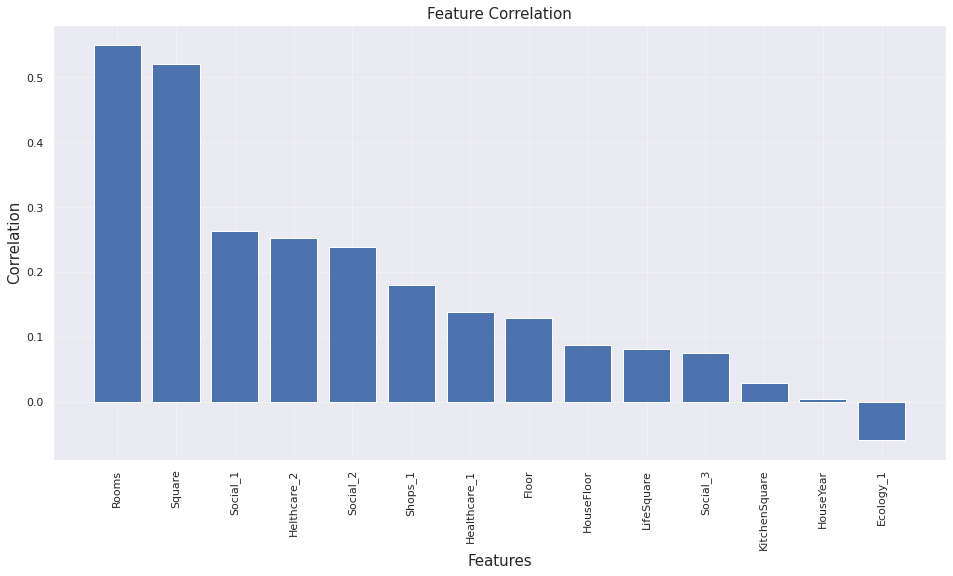

In [529]:
# Prepare Data
correlation = df_train.corrwith(df_train['Price']).sort_values(ascending=False)
correlation.drop('Price', inplace=True)

# Draw plot
plt.figure(figsize = (16,8))
plt.bar(correlation.index, correlation)
plt.xticks(rotation='90')

# Decorations    
plt.xlabel('Features', fontsize=15)
plt.ylabel('Correlation', fontsize=15)
plt.title('Feature Correlation', fontsize=15)
plt.grid(alpha=0.3)
plt.show()

Максимальная корреляция у нас отображается в зависимости от количества комнат и площади.

Text(0.5, 1.0, 'Correlation matrix')

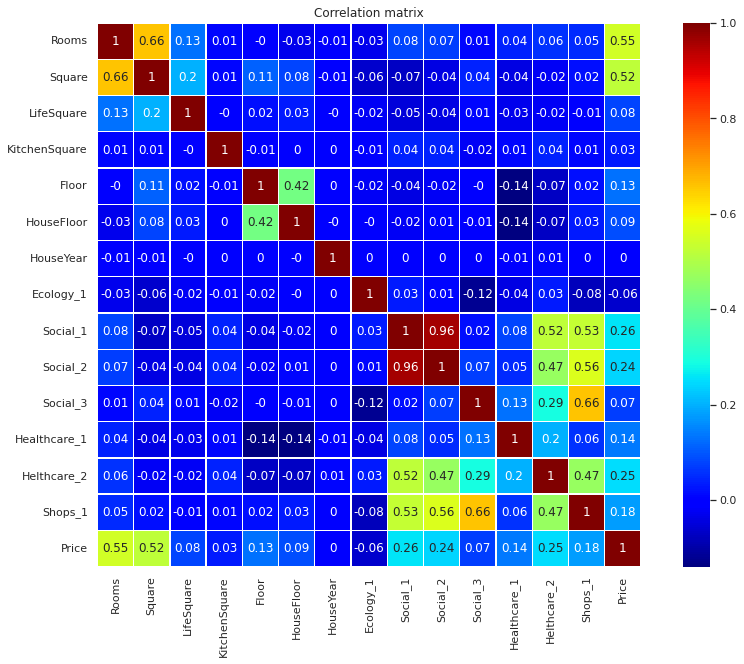

In [530]:
# Prepare Data
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)

corr_matrix = df_train.corr()
corr_matrix = np.round(corr_matrix, 2)

# Draw plot
sns.heatmap(corr_matrix, square=True, annot=True, linewidths=0.4, cmap='jet')

# Decorations  
plt.title('Correlation matrix')

На хитмап также можно наблюдать, что максимальная корреляция у нас наблюдается в зависимости от площади и количества комнат (эти признаки коррелируют между собой.)

Также стоит отметить слабую зависимость от Ecology_1 и House_Year.

Забегая вперёд можем отметить Healthcare_1 также имеет слабую взаимосвязь c таргетом и остальными фичами.

## Номинативные признаки

In [531]:
nom_feat

['Id', 'DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [532]:
def nom_feat_value_counts(nom_feat):
  for el in range(1, len(nom_feat)):
    print('\033[1m' + f'Уникальные значения номинативного признака {nom_feat[el]}:{nl * 2}'
     + '\033[0m' + f'{df_train[nom_feat[el]].value_counts()}{nl}')
    print('-' * 60)

In [533]:
nom_feat_value_counts(nom_feat)

Уникальные значения номинативного признака DistrictId:

27     851
1      652
23     565
6      511
9      294
      ... 
196      1
117      1
174      1
207      1
199      1
Name: DistrictId, Length: 205, dtype: int64

------------------------------------------------------------
Уникальные значения номинативного признака Ecology_2:

B    9903
A      97
Name: Ecology_2, dtype: int64

------------------------------------------------------------
Уникальные значения номинативного признака Ecology_3:

B    9725
A     275
Name: Ecology_3, dtype: int64

------------------------------------------------------------
Уникальные значения номинативного признака Shops_2:

B    9175
A     825
Name: Shops_2, dtype: int64

------------------------------------------------------------


## Обработка выбросов

In [534]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,10000.0,1.890500,0.839512,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,10000.0,56.315775,21.058732,1.136859,41.774881,52.513310,65.900625,6.410652e+02
LifeSquare,7887.0,37.199645,86.241209,0.370619,22.769832,32.781260,45.128803,7.480592e+03
KitchenSquare,10000.0,6.273300,28.560917,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.775974,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,5.218671e-01
Social_1,10000.0,24.687000,17.532614,0.000000,6.000000,25.000000,36.000000,7.400000e+01
Social_2,10000.0,5352.157400,4006.799803,168.000000,1564.000000,5285.000000,7227.000000,1.908300e+04


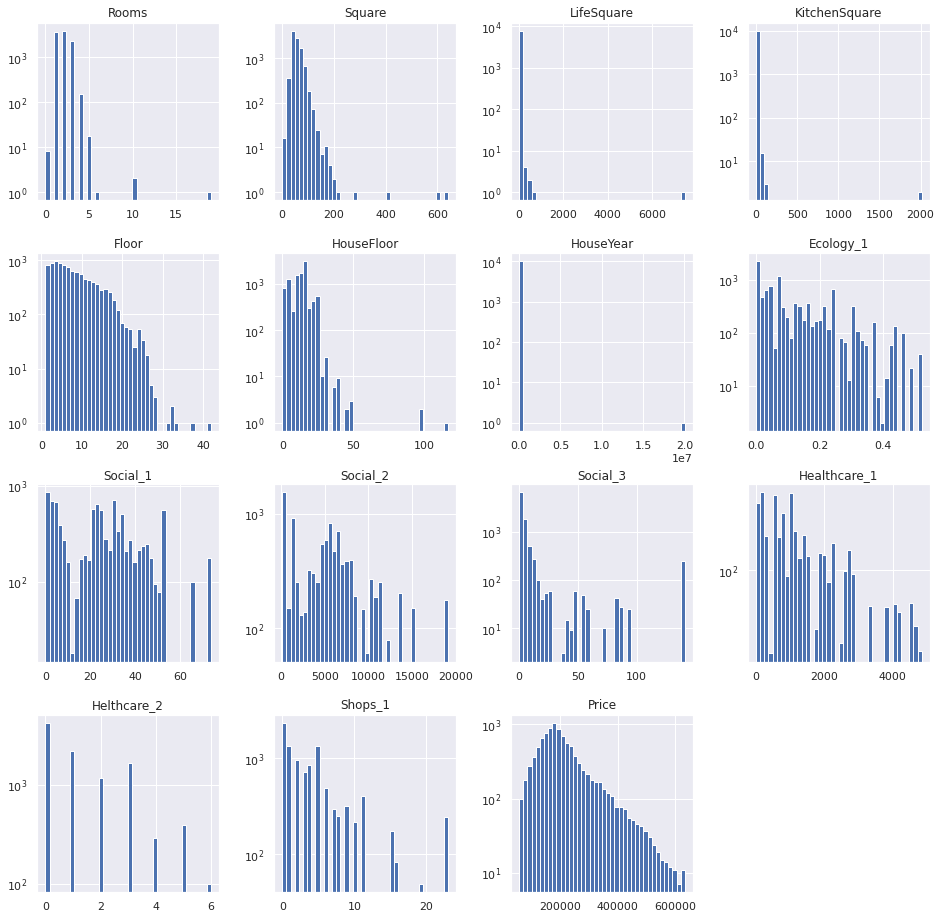

In [535]:
# Prepare Data
df_train[num_feat].hist(bins=40, figsize=(16, 16), log = True)

# Draw plot
plt.show()

Нерациональные выбросы HouseYear, KitchenSquare и признаки с необоснованно высокими значениями наблюдаются HouseFloor, LifeSquare, Rooms, Square

Рассмотрим данные подробнее

### HouseYear

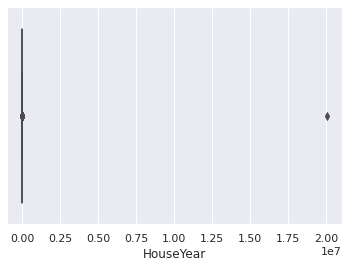

In [536]:
# Prepare Data
plt.figure(figsize=(6, 4))

# Draw plot
sns.boxplot(df_train['HouseYear'], whis=1.5, orient='h')

In [537]:
df_train.corr()['Price']['HouseYear']

0.004305394519276811

Т.е. у нас есть выбросы в этой фиче.

In [538]:
df_train['HouseYear'].sort_values(ascending=False).head()

9163    20052011
8828        4968
7246        2020
2350        2020
8296        2020
Name: HouseYear, dtype: int64

In [540]:
df_train.loc[df_train['HouseYear'] > 2020, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
8828,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096
9163,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396


Предположим, что значение 20052011 - это ошибка. Заменим 20052011 на 2011 предполагая, что 20052011 - это годы строительства.

Также заменим значение 4968 на 1968.

In [541]:
df_train.loc[df_train['HouseYear'] == 20052011, 'HouseYear'] = 2011
df_train.loc[df_train['HouseYear'] == 4968, 'HouseYear'] = 1968

In [542]:
df_filter = df_train['Id'].isin(['10814', '11607'])
df_train[df_filter]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
8828,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,1968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096
9163,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,2011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396


Если будут другие данные, то можно поставить проверку на текущий год.

In [543]:
df_train.loc[df_train['HouseYear'] > 2020, 'HouseYear'] = 2020

In [544]:
df_train.corr()['Price']['HouseYear']

0.03663377572392673

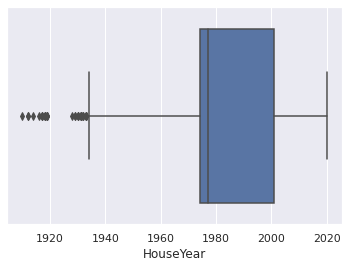

In [545]:
plt.figure(figsize=(6, 4))
sns.boxplot(df_train['HouseYear'], whis=1.5, orient='h')

У нас есть дома с датой постройки раньше 1920 года. Введём новый столбец, где обозначим, что все значения домов без выбросов - 0, а значения с выбросами - 1. И заменим даты построки старше 1920 на 1920 год.

In [546]:
current_year = 2020

In [547]:
df_train['HouseYear_outlier'] = 0
df_train.loc[df_train['HouseYear'] > current_year, 'HouseYear_outlier'] = 1   
df_train.loc[df_train['HouseYear'] < 1930, 'HouseYear_outlier'] = 1     
df_train.loc[df_train['HouseYear'] > current_year, 'HouseYear'] = current_year        
df_train.loc[df_train['HouseYear'] < 1930, 'HouseYear'] = 1930  

In [548]:
df_train.corr()['Price']['HouseYear']

0.03846392307321674

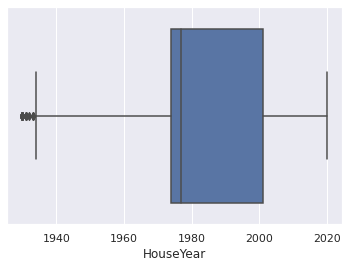

In [549]:
plt.figure(figsize=(6, 4))
sns.boxplot(df_train['HouseYear'], whis=1.5, orient='h')

### KitchenSquare

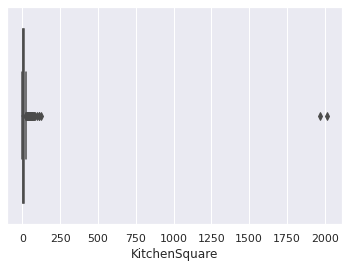

In [550]:
# Prepare data
plt.figure(figsize=(6, 4))

# Draw plot
sns.boxplot(df_train['KitchenSquare'], whis=1.5, orient='h')

In [551]:
df_train.corr()['Price']['KitchenSquare']

0.028864155113073487

In [552]:
df_train['KitchenSquare'].quantile(.975), df_train['KitchenSquare'].quantile(.05)

(13.0, 0.0)

In [553]:
df_train['KitchenSquare'].sort_values(ascending=False).head()

9520    2014.0
6505    1970.0
286      123.0
5002     112.0
7733     112.0
Name: KitchenSquare, dtype: float64

In [554]:
(df_train['KitchenSquare'] > 1750).sum()

2

In [555]:
df_train[df_train['KitchenSquare'] > 1750]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,HouseYear_outlier
6505,14679,81,1.0,32.276663,19.278394,1970.0,6,1.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,105539.556275,0
9520,14656,62,1.0,47.100719,46.447960,2014.0,4,1.0,2014,0.072158,B,B,2,629,1,NaN,0,0,A,108337.484207,0


In [556]:
df_train[df_train.KitchenSquare > df_train.Square]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,HouseYear_outlier
2785,6569,27,1.0,38.220258,18.716856,84.0,4,17.0,2018,0.011654,B,B,4,915,0,NaN,0,0,B,99079.960518,0
5273,13703,42,1.0,38.071692,19.723548,73.0,9,10.0,2006,0.158249,B,B,21,5731,0,NaN,1,0,B,160488.033165,0
6505,14679,81,1.0,32.276663,19.278394,1970.0,6,1.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,105539.556275,0
9520,14656,62,1.0,47.100719,46.447960,2014.0,4,1.0,2014,0.072158,B,B,2,629,1,NaN,0,0,A,108337.484207,0


У нас есть два значения площади кухни, которые сильно отличаются от средних.  Заменим эти значения на значение медианы.

In [557]:
condition_kitchen_square = (df_train['KitchenSquare'].isna()) | (df_train['KitchenSquare'] > df_train['KitchenSquare'].quantile(.975))
        
df_train.loc[condition_kitchen_square, 'KitchenSquare'] = df_train['KitchenSquare'].median()

In [558]:
df_train.corr()['Price']['KitchenSquare']

0.2878877844475529

In [559]:
df_train['KitchenSquare'].value_counts()

1.0     2460
8.0     1306
6.0     1227
5.0     1169
10.0    1075
9.0      843
0.0      697
7.0      609
12.0     249
11.0     233
13.0      67
4.0       39
3.0       22
2.0        4
Name: KitchenSquare, dtype: int64

Осталась проблема с минимальным размером кухни. Заменим все кухни с площадью меньше 4 на 4.

In [560]:
df_train.loc[df_train['KitchenSquare'] < 4, 'KitchenSquare'] = 4

In [561]:
df_train.corr()['Price']['KitchenSquare']

0.2981180261853782

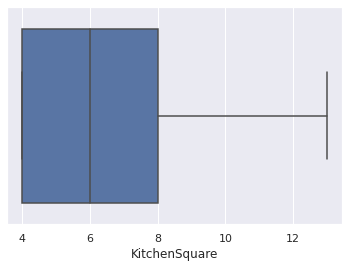

In [562]:
plt.figure(figsize=(6, 4))
sns.boxplot(df_train['KitchenSquare'], whis=1.5, orient='h')

### Square

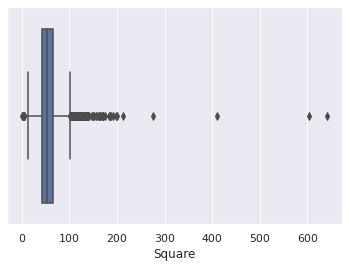

In [563]:
# Prepare data
plt.figure(figsize=(6, 4))

# Draw plot
sns.boxplot(df_train['Square'], whis=1.5, orient='h')

In [564]:
df_train['Square'].quantile(0.995)

132.82090134811978

In [565]:
df_train.corr()['Price'][['Square', 'LifeSquare', 'KitchenSquare']]

Square           0.520075
LifeSquare       0.081292
KitchenSquare    0.298118
Name: Price, dtype: float64

In [566]:
df_train['Square_outlier'] = 0
df_train.loc[df_train['Square'] > df_train['Square'].quantile(0.995), 'Square_outlier'] = 1

In [567]:
df_train[df_train['Square'] > df_train['Square'].quantile(0.995)].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,HouseYear_outlier,Square_outlier
403,13434,13,5.0,183.382273,100.985505,6.0,2,6.0,1997,0.090799,B,B,74,19083,2,NaN,5,15,B,622888.825328,0,1
599,4450,56,4.0,138.995003,NaN,4.0,16,1.0,1977,0.000000,B,B,23,5067,4,NaN,2,6,B,571939.918111,0,1
726,28,9,2.0,604.705972,NaN,4.0,17,18.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,187717.242538,0,1
730,14181,62,3.0,156.636577,153.685835,4.0,1,3.0,2005,0.072158,B,B,2,629,1,NaN,0,0,A,502523.573863,0,1
1352,10659,93,3.0,136.459101,NaN,4.0,2,2.0,1977,0.004949,B,B,0,186,0,NaN,0,0,B,200303.363117,0,1


Заменим выборосы на медиану

In [568]:
condition_square = df_train['Square'] > df_train['Square'].quantile(.995)
df_train.loc[condition_square, 'Square'] = df_train['Square'].median()

In [569]:
df_train.corr()['Price'][['Square', 'LifeSquare', 'KitchenSquare']]

Square           0.597803
LifeSquare       0.081292
KitchenSquare    0.298118
Name: Price, dtype: float64

### LifeSquare

In [570]:
df_train.corr()['Price'][['Square', 'LifeSquare', 'KitchenSquare']]

Square           0.597803
LifeSquare       0.081292
KitchenSquare    0.298118
Name: Price, dtype: float64

In [571]:
df_train[df_train['LifeSquare'] > df_train['Square']].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,HouseYear_outlier,Square_outlier
33,847,74,2.0,73.314975,74.131261,4.0,7,6.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,254005.381863,0,0
64,3992,1,3.0,87.200625,87.730225,4.0,21,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,300180.365669,0,0
77,11771,45,1.0,38.467276,39.624493,4.0,11,9.0,1977,0.195781,B,B,23,5212,6,NaN,3,2,B,247440.530601,0,0
100,13343,74,2.0,79.937665,82.931595,4.0,8,21.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,226808.747168,0,0
111,13875,20,1.0,28.438794,32.514021,6.0,6,10.0,2014,0.019509,B,B,37,7687,11,176.0,5,5,B,199248.114376,0,0


У нас есть значения пропущенные значения. А также значения, где параметр жилая площадь больше, чем общая площадь квартиры. Добавим столбец, где была пропущено значение жилой площади. Все значения заменим на медианные значения.

In [572]:
condition_LifeSquare = (df_train['LifeSquare'].isna() | (df_train['LifeSquare'] > df_train['Square']))
df_train['LifeSquare_nan'] = df_train['LifeSquare'].isna() * 1

df_train.loc[condition_LifeSquare, 'LifeSquare'] = df_train['LifeSquare'].median()

In [573]:
df_train['LifeSquare'].isna().sum()

0

In [574]:
df_train.corr()['Price'][['Square', 'LifeSquare', 'KitchenSquare']]

Square           0.597803
LifeSquare       0.408973
KitchenSquare    0.298118
Name: Price, dtype: float64

### Floor, HouseFloor

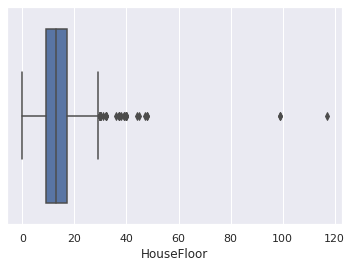

In [575]:
# Prepare data
plt.figure(figsize=(6, 4))

# Draw plot
sns.boxplot(df_train['HouseFloor'], whis=1.5, orient='h')

In [576]:
df_train.corr()['Price'][['Floor', 'HouseFloor']]

Floor         0.128715
HouseFloor    0.088280
Name: Price, dtype: float64

In [577]:
(df_train['HouseFloor'] == 0).sum()

269

In [578]:
(df_train['HouseFloor'] > df_train['HouseFloor'].quantile(0.9995)).sum()

5

У нас есть 269 значений, где нумерация этажности дома начинается с нуля. А также 5 значений высоты дома, которые значительно отклоняются от среднего.

In [579]:
df_train[df_train['HouseFloor'] > df_train['HouseFloor'].quantile(0.9995)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,HouseYear_outlier,Square_outlier,LifeSquare_nan
746,9300,74,2.0,71.747869,32.781260,9.0,5,99.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,243329.912579,0,0,0
1678,78,30,2.0,65.773749,32.781260,4.0,8,117.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B,207248.370520,0,0,0
4657,10806,5,1.0,51.944587,48.709601,4.0,6,99.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,296127.115515,0,0,0
4987,1674,76,2.0,74.344672,41.044132,5.0,42,48.0,2016,0.000000,B,B,7,1660,39,1786.0,1,5,B,411691.504766,0,0,0
5031,7453,24,3.0,126.621358,62.455481,12.0,22,48.0,2011,0.111627,B,B,50,12238,8,1970.0,2,3,B,179396.521035,0,0,0


In [580]:
df_train['HouseFloor'].mode()[0]

17.0

In [581]:
df_train.loc[df_train['Floor'] > df_train['HouseFloor']].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,HouseYear_outlier,Square_outlier,LifeSquare_nan
17,1190,8,2.0,49.396000,28.299600,5.0,6,5.0,1962,0.458174,B,A,26,4439,1,1130.0,1,5,B,186971.926566,0,0,0
19,367,45,1.0,42.367289,40.012529,4.0,16,14.0,2015,0.195781,B,B,23,5212,6,NaN,3,2,B,250466.980777,0,0,0
21,8471,20,3.0,75.611065,47.494621,8.0,11,9.0,1976,0.019509,B,B,37,7687,11,176.0,5,5,B,366916.246494,0,0,0
24,4717,27,1.0,44.203947,32.781260,4.0,2,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,135466.559958,0,0,1
25,4521,6,2.0,65.409965,32.781260,4.0,18,1.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,191205.272608,0,0,1


In [582]:
(df_train['Floor'] > df_train['HouseFloor']).sum()

1825

Также у нас есть 1825 значений таких, что этаж, на котором расположена квартира, превышает количество этажей в доме.

Добавим новый столбец, в котором присвоим для наших выбросов значение 1. А для остальных данных в новом столбце проставим 0.

In [583]:
df_train['HouseFloor_outlier'] = 0
df_train.loc[df_train['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
df_train.loc[df_train['Floor'] > df_train['HouseFloor'], 'HouseFloor_outlier'] = 1
df_train.loc[df_train['Floor'] > df_train['HouseFloor'].quantile(0.9995), 'HouseFloor_outlier'] = 1
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,HouseYear_outlier,Square_outlier,LifeSquare_nan,HouseFloor_outlier
0,11809,27,3.0,115.027311,32.781260,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089,0,0,1,0
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407,0,0,0,0
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850,0,0,0,0
3,2352,1,1.0,40.409907,32.781260,4.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630,0,0,1,0
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962,0,0,0,0


Предположим, что 0 этаж - это ошибка. Заменим значение 0 этажа на 1.

In [584]:
df_train.loc[df_train['HouseFloor'] == 0, 'HouseFloor'] = 1

In [585]:
df_train.corr()['Price'][['Floor', 'HouseFloor']]

Floor         0.128715
HouseFloor    0.088494
Name: Price, dtype: float64

Также заменим выбросы на значение моды

In [586]:
df_train.loc[df_train['HouseFloor'] > df_train['HouseFloor'].quantile(0.9995), 'HouseFloor'] = 17

In [588]:
df_train.corr()['Price'][['Floor', 'HouseFloor']]

Floor         0.128715
HouseFloor    0.089163
Name: Price, dtype: float64

Поменяем местами этажность дома и этаж на котором находится квартира.

In [589]:
floors_index_outliers = df_train[df_train['HouseFloor'] < df_train['Floor']].index
df_train.loc[floors_index_outliers, 'Floor'], df_train.loc[floors_index_outliers, 'HouseFloor'] = df_train.loc[floors_index_outliers, 'HouseFloor'], df_train.loc[floors_index_outliers, 'Floor']

In [590]:
df_train.corr()['Price'][['Floor', 'HouseFloor']]

Floor         0.109318
HouseFloor    0.116004
Name: Price, dtype: float64

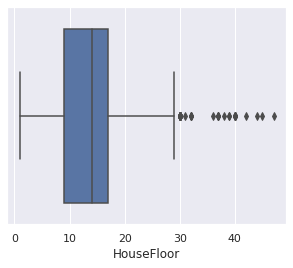

In [591]:
# Prepare data
plt.figure(figsize=(5, 4))

# Draw plot
sns.boxplot(df_train['HouseFloor'], whis=1.5, orient='h')

### Rooms

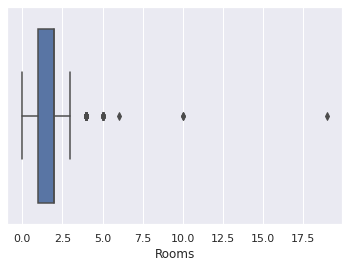

In [592]:
# Prepare data
plt.figure(figsize=(6, 4))

# Draw plot
sns.boxplot(df_train['Rooms'], whis=1.5, orient='h')

In [593]:
df_train.corr()['Price'][['Rooms']]

Rooms    0.550291
Name: Price, dtype: float64

In [594]:
df_train['Rooms'].value_counts().sort_values()

19.0       1
6.0        1
10.0       2
0.0        8
5.0       18
4.0      150
3.0     2235
1.0     3705
2.0     3880
Name: Rooms, dtype: int64

In [595]:
df_train.loc[(df_train['Rooms'] == 0)].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,HouseYear_outlier,Square_outlier,LifeSquare_nan,HouseFloor_outlier
2194,3159,88,0.0,38.697117,19.345131,9.0,9.0,16.0,1982,0.127376,B,B,43,8429,3,NaN,3,9,B,158998.110646,0,0,0,0
3780,7317,27,0.0,41.790881,32.781260,4.0,1.0,13.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,98129.976788,0,0,1,1
5894,770,28,0.0,49.483501,32.781260,4.0,1.0,16.0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463,0,0,1,1
6401,9443,27,0.0,87.762616,85.125471,4.0,5.0,15.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,219281.918007,0,0,0,0
7644,7917,27,0.0,52.513310,32.781260,4.0,2.0,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887,0,1,0,0


In [596]:
df_train.loc[(df_train['Rooms'] >= 6)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,HouseYear_outlier,Square_outlier,LifeSquare_nan,HouseFloor_outlier
2004,5927,57,10.0,59.056975,36.223072,10.0,22.0,22.0,2002,0.090799,B,B,74,19083,2,NaN,5,15,B,317265.323792,0,0,0,0
2728,14865,9,10.0,60.871266,38.420681,10.0,2.0,3.0,1994,0.161532,B,B,25,5648,1,30.0,2,4,B,172329.270863,0,0,0,1
6088,8491,1,19.0,42.006046,21.779288,7.0,17.0,17.0,2014,0.007122,B,B,1,264,0,NaN,0,1,B,78364.616704,0,0,0,0
8794,14003,99,6.0,59.414334,38.702244,6.0,7.0,9.0,1969,0.033494,B,B,66,10573,1,1322.0,3,8,B,229661.964416,0,0,0,0


У нас есть выбросы, а также есть значение 0. Обозначим эти как за ошибочные значения.

In [597]:
df_train['Rooms_outlier'] = 0
df_train.loc[(df_train['Rooms'] == 0) | (df_train['Rooms'] >= 6), 'Rooms_outlier'] = 1
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,HouseYear_outlier,Square_outlier,LifeSquare_nan,HouseFloor_outlier,Rooms_outlier
0,11809,27,3.0,115.027311,32.781260,10.0,4.0,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089,0,0,1,0,0
1,3013,22,1.0,39.832524,23.169223,8.0,7.0,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407,0,0,0,0,0
2,8215,1,3.0,78.342215,47.671972,10.0,2.0,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850,0,0,0,0,0
3,2352,1,1.0,40.409907,32.781260,4.0,10.0,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630,0,0,1,0,0
4,13866,94,2.0,64.285067,38.562517,9.0,16.0,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962,0,0,0,0,0


Заменим данные с 0 на медиану.



In [598]:
df_train.loc[df_train['Rooms'] == 0, 'Rooms'] = 1
df_train.loc[df_train['Rooms'] >= 6, 'Rooms'] = df_train['Rooms'].median()

In [599]:
df_train.corr()['Price'][['Rooms']]

Rooms    0.571514
Name: Price, dtype: float64

Рассмотрим медианные значения площадей в зависимости от количества комнат.

In [600]:
df_train.loc[df_train['Rooms'].isin([1, 2, 3, 4, 5]), ['Rooms', 'Price','Square']].groupby('Rooms').median()

,Price,Square
Rooms,,
1.0,155012.207721,40.412437
2.0,200320.754636,55.821729
3.0,268723.157677,77.207992
4.0,377524.231990,96.502791
5.0,455355.638212,101.837466


Заменим значения с количеством комнат больше шести на значения количества  комнат близких по площади квартир.

In [601]:
df_train.loc[(df_train['Rooms'] >= 6) & (df_train['Square'] >= 50), 'Rooms'] = 2
df_train.loc[(df_train['Rooms'] >= 6) & (df_train['Square'] < 50), 'Rooms'] = 1

In [602]:
df_train.corr()['Price'][['Rooms']]

Rooms    0.571514
Name: Price, dtype: float64

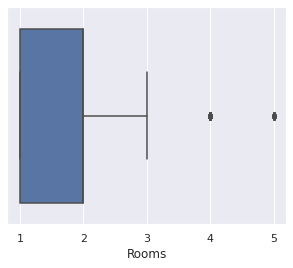

In [603]:
# Prepare data
plt.figure(figsize=(5, 4))

# Draw plot
sns.boxplot(df_train['Rooms'], whis=1.5, orient='h')

## Обработка отстутсвующих значений.

Составим карту отсутствующих значений.

Text(30.5, 0.5, 'Values')

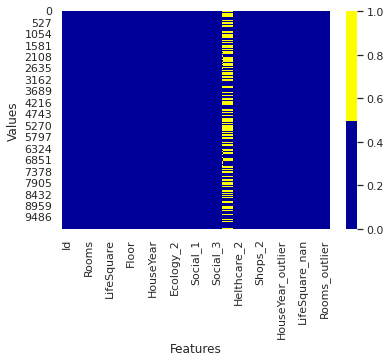

In [604]:
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(df_train[df_train.columns].isnull(), cmap=sns.color_palette(colours))

# Decorations
plt.xlabel('Features')
plt.ylabel('Values')

Видно, что у нас есть отсутствующие значения в признаках Healthcare_1. Найдём долю отсутсвующих значений в по признакам.

In [605]:
colums_with_na = ['Healthcare_1']

for col in colums_with_na:    
    print('{} - {}%'.format(col, round(np.mean(df_train[col].isnull()) * 100, 2)))  

Healthcare_1 - 47.98%


Можем вспомнить слабую корреляцию Healthcare_1 с остальными фичами и, учитывая большое количество пропусков данных в этой фиче, удалим этот столбец.

In [606]:
df_train.drop(['Healthcare_1'], axis = 1, inplace=True)

In [607]:
df_train.isnull().sum()

Id                    0
DistrictId            0
Rooms                 0
Square                0
LifeSquare            0
KitchenSquare         0
Floor                 0
HouseFloor            0
HouseYear             0
Ecology_1             0
Ecology_2             0
Ecology_3             0
Social_1              0
Social_2              0
Social_3              0
Helthcare_2           0
Shops_1               0
Shops_2               0
Price                 0
HouseYear_outlier     0
Square_outlier        0
LifeSquare_nan        0
HouseFloor_outlier    0
Rooms_outlier         0
dtype: int64

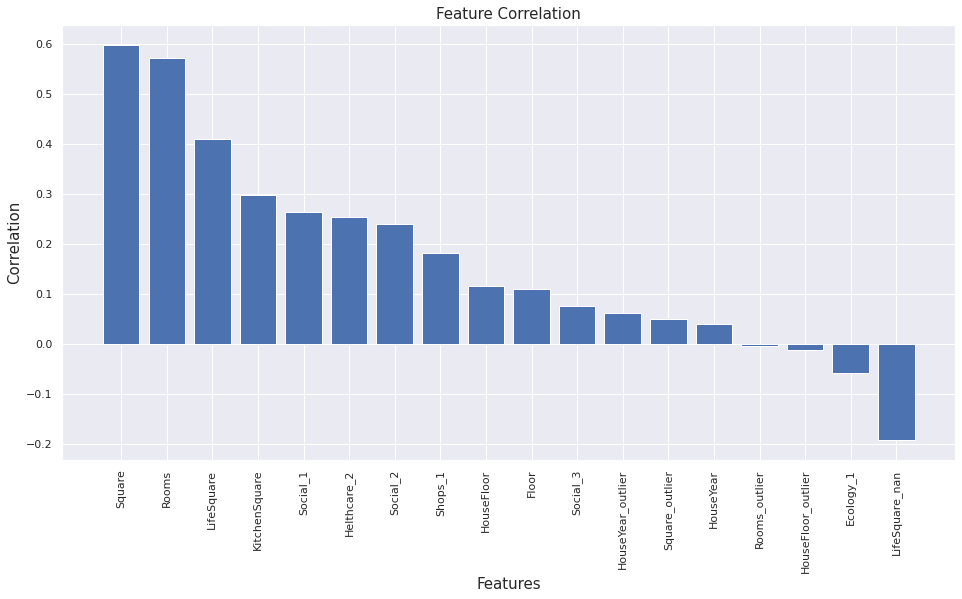

In [608]:
# Prepare Data
correlation = df_train.corrwith(df_train['Price']).sort_values(ascending=False)
correlation.drop('Price', inplace=True)

# Draw plot
plt.figure(figsize = (16,8))
plt.bar(correlation.index, correlation)
plt.xticks(rotation='90')

# Decorations    
plt.xlabel('Features', fontsize=15)
plt.ylabel('Correlation', fontsize=15)
plt.title('Feature Correlation', fontsize=15)
plt.show()

In [609]:
df_train.corr()['Price'][['Square', 'Rooms', 'LifeSquare', 'KitchenSquare', 'HouseFloor', 'Floor']]

Square           0.597803
Rooms            0.571514
LifeSquare       0.408973
KitchenSquare    0.298118
HouseFloor       0.116004
Floor            0.109318
Name: Price, dtype: float64

# Создание необходимых функций. Класс DataPreprocessing

In [610]:
class DataPreprocessing():
    """Подготовка исходных данных"""

    def __init__(self):
        """Параметры класса"""
        self.medians = None
        self.kitchen_square_quantile = None
        self.square_quantile = None
        self.floor_quantile = None

        self.modes = None

        self.Rooms_a = 2
        self.Rooms_b = 1
        self.year = 1930
        
    def fit(self, data):
        """Сохранение статистик"""       
        # Расчет медиан
        self.medians = data.median()
        self.kitchen_square_quantile = data['KitchenSquare'].quantile(0.975)
        self.square_quantile = data['Square'].quantile(0.995)
        self.floor_quantile = data['HouseFloor'].quantile(0.9995)
        # self.house_floor_mode = data['HouseFloor'].mode()[0]
        self.modes = data.mode()
           
    def transform(self, data):
        """Трансформация данных"""

        # Rooms
        
        # вводим новый столбец

        data['Rooms_outlier'] = 0
        data.loc[(data['Rooms'] == 0) | (data['Rooms'] >= 6), 'Rooms_outlier'] = 1

        # меняем значения в выбросах
        data.loc[data['Rooms'] == 0, 'Rooms'] = 1
        data.loc[(data['Rooms'] >= 6) & (data['Square'] >= 50), 'Rooms'] = self.Rooms_a
        data.loc[(data['Rooms'] >= 6) & (data['Square'] < 50), 'Rooms'] = self.Rooms_b

        # KitchenSquare
        
        condition_kitchen_square = (data['KitchenSquare'].isna()) | (data['KitchenSquare'] > self.kitchen_square_quantile)
        
        data.loc[condition_kitchen_square, 'KitchenSquare'] = data['KitchenSquare'].median()
        
        data.loc[data['KitchenSquare'] < 4, 'KitchenSquare'] = 4

        # HouseFloor, Floor
        
        # вводим новый столбец
        data['HouseFloor_outlier'] = 0
        data.loc[data['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
        data.loc[data['Floor'] > data['HouseFloor'], 'HouseFloor_outlier'] = 1
        data.loc[data['Floor'] > self.floor_quantile, 'HouseFloor_outlier'] = 1

        # меняем значения в выбросах
        data.loc[data['HouseFloor'] == 0, 'HouseFloor'] = 1
        data.loc[data['HouseFloor'] > self.floor_quantile, 'HouseFloor'] = self.modes['HouseFloor'][0]


        floors_index_outliers = data[data['HouseFloor'] < data['Floor']].index
        data.loc[floors_index_outliers, 'Floor'], data.loc[floors_index_outliers, 'HouseFloor'] = \
        data.loc[floors_index_outliers, 'HouseFloor'], data.loc[floors_index_outliers, 'Floor']        

        # HouseYear
        data.loc[data['HouseYear'] == 20052011, 'HouseYear'] = 2011
        data.loc[data['HouseYear'] == 4968, 'HouseYear'] = 1968 

        current_year = datetime.now().year
        
        data['HouseYear_outlier'] = 0
        data.loc[data['HouseYear'] > current_year, 'HouseYear_outlier'] = 1   
        data.loc[data['HouseYear'] < self.year, 'HouseYear_outlier'] = 1     
        data.loc[data['HouseYear'] > current_year, 'HouseYear'] = current_year        
        data.loc[data['HouseYear'] < self.year, 'HouseYear'] = self.year      
        
        # Healthcare_1
        if 'Healthcare_1' in data.columns:
            data.drop('Healthcare_1', axis=1, inplace=True)

        # Square

        # вводим новый столбец
        condition_square = data['Square'] > self.square_quantile

        data['Square_outlier'] = 0
        data.loc[condition_square, 'Square_outlier'] = 1
        
        data.loc[condition_square, 'Square'] = data['Square'].median()      

        # LifeSquareMy
        data['LifeSquare_nan'] = data['LifeSquare'].isna() * 1

        condition_LifeSquare = (df_train['LifeSquare'].isna() | (df_train['LifeSquare'] > df_train['Square']))
        data.loc[condition_LifeSquare, 'LifeSquare'] = data['LifeSquare'].median()        

        data.fillna(self.medians, inplace=True)

        return data

# Построение новых признаков

## Переведем категориальные признаки в числовой вид

In [611]:
binary_to_numbers = {'A': 0, 'B': 1}
cat_feats=['Ecology_2', 'Ecology_3', 'Shops_2']

def cat_to_num(data, binary_to_numbers, cat_feats):
  data_c = data.copy()
  for cat in cat_feats:
    data_c[cat].replace(binary_to_numbers, inplace = True)
  return data_c

In [612]:
cat_to_num(df_train, binary_to_numbers, cat_feats).head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,HouseYear_outlier,Square_outlier,LifeSquare_nan,HouseFloor_outlier,Rooms_outlier
0,11809,27,3.0,115.027311,32.781260,10.0,4.0,10.0,2014,0.075424,1,1,11,3097,0,0,0,1,305018.871089,0,0,1,0,0
1,3013,22,1.0,39.832524,23.169223,8.0,7.0,8.0,1966,0.118537,1,1,30,6207,1,1,0,1,177734.553407,0,0,0,0,0
2,8215,1,3.0,78.342215,47.671972,10.0,2.0,17.0,1988,0.025609,1,1,33,5261,0,3,1,1,282078.720850,0,0,0,0,0
3,2352,1,1.0,40.409907,32.781260,4.0,10.0,22.0,1977,0.007122,1,1,1,264,0,0,1,1,168106.007630,0,0,1,0,0
4,13866,94,2.0,64.285067,38.562517,9.0,16.0,16.0,1972,0.282798,1,1,33,8667,2,0,6,1,343995.102962,0,0,0,0,0


## Средние

### Медианная цена по комнатам

In [613]:
median_price_by_rooms = df_train.groupby('Rooms', as_index=False).agg({'Price': 'median'}).rename(columns={'Price':'median_price_by_rooms'})
median_price_by_rooms

,Rooms,median_price_by_rooms
0,1.0,155012.207721
1,2.0,200320.754636
2,3.0,268723.157677
3,4.0,377524.231990
4,5.0,455355.638212


In [614]:
df_train = df_train.merge(median_price_by_rooms, on='Rooms', how='left')
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,HouseYear_outlier,Square_outlier,LifeSquare_nan,HouseFloor_outlier,Rooms_outlier,median_price_by_rooms
0,11809,27,3.0,115.027311,32.781260,10.0,4.0,10.0,2014,0.075424,B,B,11,3097,0,0,0,B,305018.871089,0,0,1,0,0,268723.157677
1,3013,22,1.0,39.832524,23.169223,8.0,7.0,8.0,1966,0.118537,B,B,30,6207,1,1,0,B,177734.553407,0,0,0,0,0,155012.207721
2,8215,1,3.0,78.342215,47.671972,10.0,2.0,17.0,1988,0.025609,B,B,33,5261,0,3,1,B,282078.720850,0,0,0,0,0,268723.157677
3,2352,1,1.0,40.409907,32.781260,4.0,10.0,22.0,1977,0.007122,B,B,1,264,0,0,1,B,168106.007630,0,0,1,0,0,155012.207721
4,13866,94,2.0,64.285067,38.562517,9.0,16.0,16.0,1972,0.282798,B,B,33,8667,2,0,6,B,343995.102962,0,0,0,0,0,200320.754636


### Медианная цена за по району

In [615]:
median_price_by_dist = pd.Series(df_train.groupby(['DistrictId'])['Price'].agg('median') / df_train.groupby(['DistrictId'])['Square'].agg('median'), name="median_price_by_dist").to_frame()
median_price_by_dist.head()

,median_price_by_dist
DistrictId,
0,3387.084585
1,3053.968579
10,4368.622761
100,4876.247474
101,3970.074724


In [616]:
df_train = df_train.merge(median_price_by_dist, on='DistrictId', how='left')
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,HouseYear_outlier,Square_outlier,LifeSquare_nan,HouseFloor_outlier,Rooms_outlier,median_price_by_rooms,median_price_by_dist
0,11809,27,3.0,115.027311,32.781260,10.0,4.0,10.0,2014,0.075424,B,B,11,3097,0,0,0,B,305018.871089,0,0,1,0,0,268723.157677,2689.711076
1,3013,22,1.0,39.832524,23.169223,8.0,7.0,8.0,1966,0.118537,B,B,30,6207,1,1,0,B,177734.553407,0,0,0,0,0,155012.207721,3825.571310
2,8215,1,3.0,78.342215,47.671972,10.0,2.0,17.0,1988,0.025609,B,B,33,5261,0,3,1,B,282078.720850,0,0,0,0,0,268723.157677,3053.968579
3,2352,1,1.0,40.409907,32.781260,4.0,10.0,22.0,1977,0.007122,B,B,1,264,0,0,1,B,168106.007630,0,0,1,0,0,155012.207721,3053.968579
4,13866,94,2.0,64.285067,38.562517,9.0,16.0,16.0,1972,0.282798,B,B,33,8667,2,0,6,B,343995.102962,0,0,0,0,0,200320.754636,4011.718265


### Медианная цена по районам и количеству комнат

In [617]:
med_price_distr_rooms = df_train.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                            .rename(columns={'Price':'med_price_distr_rooms'})

med_price_distr_rooms.head()

,DistrictId,Rooms,med_price_distr_rooms
0,0,1.0,142799.434052
1,0,2.0,176210.812334
2,0,3.0,300610.359425
3,1,1.0,146735.671740
4,1,2.0,202666.310126


In [618]:
df_train = df_train.merge(med_price_distr_rooms, on=['DistrictId', 'Rooms'], how='left')
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,HouseYear_outlier,Square_outlier,LifeSquare_nan,HouseFloor_outlier,Rooms_outlier,median_price_by_rooms,median_price_by_dist,med_price_distr_rooms
0,11809,27,3.0,115.027311,32.781260,10.0,4.0,10.0,2014,0.075424,B,B,11,3097,0,0,0,B,305018.871089,0,0,1,0,0,268723.157677,2689.711076,213530.788443
1,3013,22,1.0,39.832524,23.169223,8.0,7.0,8.0,1966,0.118537,B,B,30,6207,1,1,0,B,177734.553407,0,0,0,0,0,155012.207721,3825.571310,146032.829834
2,8215,1,3.0,78.342215,47.671972,10.0,2.0,17.0,1988,0.025609,B,B,33,5261,0,3,1,B,282078.720850,0,0,0,0,0,268723.157677,3053.968579,244005.272380
3,2352,1,1.0,40.409907,32.781260,4.0,10.0,22.0,1977,0.007122,B,B,1,264,0,0,1,B,168106.007630,0,0,1,0,0,155012.207721,3053.968579,146735.671740
4,13866,94,2.0,64.285067,38.562517,9.0,16.0,16.0,1972,0.282798,B,B,33,8667,2,0,6,B,343995.102962,0,0,0,0,0,200320.754636,4011.718265,201584.441255


### Медианная цена по категориям этажей и годам постройки.

Разобьём этажи и года части и присвоим категории.

In [619]:
def floor_to_cat(data):
    bins = [data['Floor'].min(), 3, 5, 9, 15, data['Floor'].max()]
    data['floor_cat'] = pd.cut(data['Floor'], bins=bins, labels=False)
    
    data['floor_cat'].fillna(-1, inplace=True)
    return data

def year_to_cat(data):
    bins = [data['HouseYear'].min(), 1941, 1945, 1980, 2000, 2010, data['HouseYear'].max()]
    data['year_cat'] = pd.cut(data['HouseYear'], bins=bins, labels=False)
    
    data['year_cat'].fillna(-1, inplace=True)
    return data

In [620]:
bins = [df_train['Floor'].min(), 3, 5, 9, 15, df_train['Floor'].max()]
pd.cut(df_train['Floor'], bins=bins, labels=False)

0       1.0
1       2.0
2       0.0
3       3.0
4       4.0
       ... 
9995    0.0
9996    NaN
9997    0.0
9998    0.0
9999    2.0
Name: Floor, Length: 10000, dtype: float64

In [621]:
bins = [df_train['Floor'].min(), 3, 5, 9, 15, df_train['Floor'].max()]
pd.cut(df_train['Floor'], bins=bins)

0         (3.0, 5.0]
1         (5.0, 9.0]
2         (1.0, 3.0]
3        (9.0, 15.0]
4       (15.0, 37.0]
            ...     
9995      (1.0, 3.0]
9996             NaN
9997      (1.0, 3.0]
9998      (1.0, 3.0]
9999      (5.0, 9.0]
Name: Floor, Length: 10000, dtype: category
Categories (5, interval[float64]): [(1.0, 3.0] < (3.0, 5.0] < (5.0, 9.0] < (9.0, 15.0] <
                                    (15.0, 37.0]]

Добавим категории в датафрейм.

In [622]:
df_train = year_to_cat(df_train)
df_train = floor_to_cat(df_train)
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,HouseYear_outlier,Square_outlier,LifeSquare_nan,HouseFloor_outlier,Rooms_outlier,median_price_by_rooms,median_price_by_dist,med_price_distr_rooms,year_cat,floor_cat
0,11809,27,3.0,115.027311,32.781260,10.0,4.0,10.0,2014,0.075424,B,B,11,3097,0,0,0,B,305018.871089,0,0,1,0,0,268723.157677,2689.711076,213530.788443,5.0,1.0
1,3013,22,1.0,39.832524,23.169223,8.0,7.0,8.0,1966,0.118537,B,B,30,6207,1,1,0,B,177734.553407,0,0,0,0,0,155012.207721,3825.571310,146032.829834,2.0,2.0
2,8215,1,3.0,78.342215,47.671972,10.0,2.0,17.0,1988,0.025609,B,B,33,5261,0,3,1,B,282078.720850,0,0,0,0,0,268723.157677,3053.968579,244005.272380,3.0,0.0
3,2352,1,1.0,40.409907,32.781260,4.0,10.0,22.0,1977,0.007122,B,B,1,264,0,0,1,B,168106.007630,0,0,1,0,0,155012.207721,3053.968579,146735.671740,2.0,3.0
4,13866,94,2.0,64.285067,38.562517,9.0,16.0,16.0,1972,0.282798,B,B,33,8667,2,0,6,B,343995.102962,0,0,0,0,0,200320.754636,4011.718265,201584.441255,2.0,4.0


In [623]:
med_price_by_floor_year = df_train.groupby(['year_cat', 'floor_cat'], as_index=False).agg({'Price':'median'}).\
                                            rename(columns={'Price':'med_price_by_floor_year'})
med_price_by_floor_year.head()

,year_cat,floor_cat,med_price_by_floor_year
0,-1.0,-1.0,300001.927452
1,-1.0,0.0,321319.463437
2,-1.0,1.0,350361.674161
3,-1.0,2.0,287954.720682
4,0.0,-1.0,238992.104256


In [624]:
df_train = df_train.merge(med_price_by_floor_year, on=['year_cat', 'floor_cat'], how='left')
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,HouseYear_outlier,Square_outlier,LifeSquare_nan,HouseFloor_outlier,Rooms_outlier,median_price_by_rooms,median_price_by_dist,med_price_distr_rooms,year_cat,floor_cat,med_price_by_floor_year
0,11809,27,3.0,115.027311,32.781260,10.0,4.0,10.0,2014,0.075424,B,B,11,3097,0,0,0,B,305018.871089,0,0,1,0,0,268723.157677,2689.711076,213530.788443,5.0,1.0,161744.506404
1,3013,22,1.0,39.832524,23.169223,8.0,7.0,8.0,1966,0.118537,B,B,30,6207,1,1,0,B,177734.553407,0,0,0,0,0,155012.207721,3825.571310,146032.829834,2.0,2.0,193455.822517
2,8215,1,3.0,78.342215,47.671972,10.0,2.0,17.0,1988,0.025609,B,B,33,5261,0,3,1,B,282078.720850,0,0,0,0,0,268723.157677,3053.968579,244005.272380,3.0,0.0,205210.068542
3,2352,1,1.0,40.409907,32.781260,4.0,10.0,22.0,1977,0.007122,B,B,1,264,0,0,1,B,168106.007630,0,0,1,0,0,155012.207721,3053.968579,146735.671740,2.0,3.0,184232.546035
4,13866,94,2.0,64.285067,38.562517,9.0,16.0,16.0,1972,0.282798,B,B,33,8667,2,0,6,B,343995.102962,0,0,0,0,0,200320.754636,4011.718265,201584.441255,2.0,4.0,175503.767602


## Размер района по количеству квартир

In [625]:
district_size = df_train['DistrictId'].value_counts().reset_index()\
                    .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})

district_size.head()

,DistrictId,DistrictSize
0,27,851
1,1,652
2,23,565
3,6,511
4,9,294


In [626]:
df_train = df_train.merge(district_size, on='DistrictId', how='left')
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,HouseYear_outlier,Square_outlier,LifeSquare_nan,HouseFloor_outlier,Rooms_outlier,median_price_by_rooms,median_price_by_dist,med_price_distr_rooms,year_cat,floor_cat,med_price_by_floor_year,DistrictSize
0,11809,27,3.0,115.027311,32.781260,10.0,4.0,10.0,2014,0.075424,B,B,11,3097,0,0,0,B,305018.871089,0,0,1,0,0,268723.157677,2689.711076,213530.788443,5.0,1.0,161744.506404,851
1,3013,22,1.0,39.832524,23.169223,8.0,7.0,8.0,1966,0.118537,B,B,30,6207,1,1,0,B,177734.553407,0,0,0,0,0,155012.207721,3825.571310,146032.829834,2.0,2.0,193455.822517,78
2,8215,1,3.0,78.342215,47.671972,10.0,2.0,17.0,1988,0.025609,B,B,33,5261,0,3,1,B,282078.720850,0,0,0,0,0,268723.157677,3053.968579,244005.272380,3.0,0.0,205210.068542,652
3,2352,1,1.0,40.409907,32.781260,4.0,10.0,22.0,1977,0.007122,B,B,1,264,0,0,1,B,168106.007630,0,0,1,0,0,155012.207721,3053.968579,146735.671740,2.0,3.0,184232.546035,652
4,13866,94,2.0,64.285067,38.562517,9.0,16.0,16.0,1972,0.282798,B,B,33,8667,2,0,6,B,343995.102962,0,0,0,0,0,200320.754636,4011.718265,201584.441255,2.0,4.0,175503.767602,89


# Создание необходимых функций. Класс FeatureGenerator

In [627]:
class FeatureGenerator():
    """Генерация новых фич"""
    
    def __init__(self):        
        self.binary_to_numbers = None
        self.cat_features = None
        self.median_price_by_rooms = None
        self.median_price_by_dist = None
        self.med_price_distr_rooms = None
        self.district_size = None

        self.med_price_by_floor_year = None
        self.house_year_max = None
        self.floor_max = None
                        
    def fit(self, data, y=None):
        
        data = data.copy()
        
        # Binary features
        self.binary_to_numbers = {'A': 0, 'B': 1}
        self.cat_features = ['Ecology_2', 'Ecology_3', 'Shops_2']

        # DistrictID
        self.district_size = data['DistrictId'].value_counts().reset_index().rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})

        # Target encoding
        df = data.copy()

        # Medians
        if y is not None:
            df['Price'] = y.values
            
            # median_price_by_rooms
            self.median_price_by_rooms = df.groupby('Rooms', as_index=False).agg({'Price': 'median'}).rename(columns={'Price':'median_price_by_rooms'})
            self.median_price_by_rooms_median = self.median_price_by_rooms['median_price_by_rooms'].median()
            
            # median_price_by_dist
            self.median_price_by_dist = pd.Series(df.groupby(['DistrictId'])['Price'].agg('median')\
                                               / df.groupby(['DistrictId'])['Square'].agg('median'), \
                                               name="median_price_by_dist").to_frame()
            self.median_price_by_dist_median = self.median_price_by_dist['median_price_by_dist'].median()

            # med_price_distr_rooms
            self.med_price_distr_rooms = df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                            .rename(columns={'Price':'med_price_distr_rooms'})
            self.med_price_distr_rooms_median = self.med_price_distr_rooms['med_price_distr_rooms'].median()
   
        ## floor, year
        if y is not None:
            self.floor_max = df['Floor'].max()
            self.house_year_max = df['HouseYear'].max()
            df['Price'] = y.values
            df = self.floor_to_cat(df)
            df = self.year_to_cat(df)
            self.med_price_by_floor_year = df.groupby(['year_cat', 'floor_cat'], as_index=False).agg({'Price':'median'}).\
                                            rename(columns={'Price':'med_price_by_floor_year'})
            self.med_price_by_floor_year_median = self.med_price_by_floor_year['med_price_by_floor_year'].median()
                         
    def transform(self, data, y=None):
        
        # # Binary features        
        for cat in self.cat_features:    
            data[cat].replace(self.binary_to_numbers, inplace = True)


        # data['Ecology_2'] = data['Ecology_2'].map(self.binary_to_numbers)  
        # data['Ecology_3'] = data['Ecology_3'].map(self.binary_to_numbers)
        # data['Shops_2'] = data['Shops_2'].map(self.binary_to_numbers)


        # District_size IsDistrictLarge
        data = data.merge(self.district_size, on='DistrictId', how='left')

        data['new_district'] = 0
        data.loc[data['DistrictSize'].isna(), 'new_district'] = 1
        
        data['DistrictSize'].fillna(5, inplace=True)        
        data['IsDistrictLarge'] = (data['DistrictSize'] > 100).astype(int)

        # Target encoding

        # Median_price_by_Rooms
        if self.median_price_by_rooms is not None:
          data = data.merge(self.median_price_by_rooms, on='Rooms', how='left')
          data.fillna(self.median_price_by_rooms_median, inplace=True)

        # Median_price_by_dist
        if self.median_price_by_dist is not None:
          data = data.merge(self.median_price_by_dist, on='DistrictId', how='left')
          data.fillna(self.median_price_by_dist_median, inplace=True)


        # Median_price_distr_rooms
        if self.med_price_distr_rooms is not None:
            data = data.merge(self.med_price_distr_rooms, on=['DistrictId', 'Rooms'], how='left')
            data.fillna(self.med_price_distr_rooms_median, inplace=True)


        # More categorical features
        data = self.floor_to_cat(data)  # + столбец floor_cat
        data = self.year_to_cat(data)   # + столбец year_cat
        
                    
        if self.med_price_by_floor_year is not None:
            data = data.merge(self.med_price_by_floor_year, on=['year_cat', 'floor_cat'], how='left')
            data.fillna(self.med_price_by_floor_year_median, inplace=True)
              
        return data



    def floor_to_cat(self, data):
        bins = [0, 3, 5, 9, 15, self.floor_max]
        data['floor_cat'] = pd.cut(data['Floor'], bins=bins, labels=False)

        data['floor_cat'].fillna(-1, inplace=True) 
        return data
     
    def year_to_cat(self, data):
        bins = [0, 1941, 1945, 1980, 2000, 2010, self.house_year_max]
        data['year_cat'] = pd.cut(data['HouseYear'], bins=bins, labels=False)

        data['year_cat'].fillna(-1, inplace=True)
        return data

In [628]:
df_train.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'HouseYear_outlier',
 'Square_outlier',
 'LifeSquare_nan',
 'HouseFloor_outlier',
 'Rooms_outlier',
 'median_price_by_rooms',
 'median_price_by_dist',
 'med_price_distr_rooms',
 'year_cat',
 'floor_cat',
 'med_price_by_floor_year',
 'DistrictSize']

# Выбор фичей

In [629]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
                #  'Floor', 
                 'HouseFloor', 'HouseYear', 'Ecology_1',
                 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2',
                 'Social_3', 'Helthcare_2', 'Shops_1', 'Shops_2']      

new_feature_names = ['HouseYear_outlier', 'Square_outlier', 'LifeSquare_nan',
                     'HouseFloor_outlier', 'Rooms_outlier', 
                     #  'median_price_by_rooms',
                     'median_price_by_dist', 
                    #  'med_price_distr_rooms', 
                     'med_price_by_floor_year', 'DistrictSize', 'new_district', 'IsDistrictLarge']


                     
target_name = 'Price'

# Разбиение на train и test

In [630]:
df_train = pd.read_csv(TRAIN_DATASET_PATH)
df_test = pd.read_csv(TEST_DATASET_PATH)

X = df_train.drop(columns=target_name)
y = df_train[target_name]

In [631]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=21)

In [632]:
preprocessor = DataPreprocessing()
preprocessor.fit(X_train)

X_train = preprocessor.transform(X_train)
X_valid = preprocessor.transform(X_valid)
df_test = preprocessor.transform(df_test)

X_train.shape, X_valid.shape, df_test.shape

((8500, 23), (1500, 23), (5000, 23))

In [633]:
features_gen = FeatureGenerator()
features_gen.fit(X_train, y_train)

X_train = features_gen.transform(X_train)
X_valid = features_gen.transform(X_valid)
df_test = features_gen.transform(df_test)

X_train.shape, X_valid.shape, df_test.shape

((8500, 32), (1500, 32), (5000, 32))

In [634]:
len(new_feature_names)

10

In [635]:
X_train = X_train[feature_names + new_feature_names]
X_valid = X_valid[feature_names + new_feature_names]
df_test = df_test[feature_names + new_feature_names]

print(X_train.isna().sum().sum(), X_valid.isna().sum().sum(), df_test.isna().sum().sum())

0 0 0


# Catboost

Train R2:	0.925
Test R2:	0.781


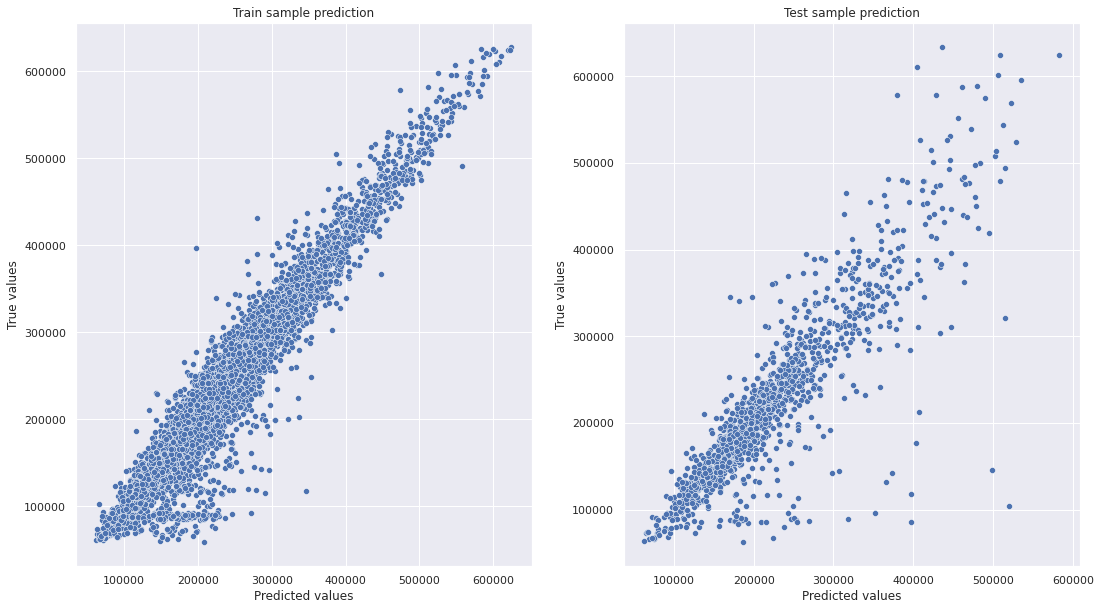

In [636]:
from catboost import CatBoostRegressor

cb_model = CatBoostRegressor(silent=True, learning_rate=0.03, depth=9, l2_leaf_reg=2, iterations=900, loss_function='RMSE', eval_metric='R2', random_seed=21)
cb_model.fit(X_train, y_train)

y_train_preds = cb_model.predict(X_train)
y_test_preds = cb_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

## Кросс-валидация

In [637]:
cv_score = cross_val_score(cb_model, X_train, y_train, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=21))
cv_score

array([0.76690457, 0.76625833, 0.73741218])

In [638]:
cv_score.mean()

0.7568583578241004

## Feature Importances

In [639]:
feature_importances = pd.DataFrame(zip(X_train.columns, cb_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
1,Square,26.307160
20,median_price_by_dist,19.730079
21,med_price_by_floor_year,5.913437
5,HouseYear,5.394161
4,HouseFloor,4.798977
3,KitchenSquare,4.647625
2,LifeSquare,4.488851
22,DistrictSize,4.369389
6,Ecology_1,4.346347
0,Rooms,3.602356


# Прогнозирование на тестовом датасете

In [640]:
df_test.shape

(5000, 25)

In [641]:
submit = pd.read_csv(SAMPLE_DATASET_PATH)
submit.head()

,Id,Price
0,4567,200000.0
1,5925,200000.0
2,960,200000.0
3,3848,200000.0
4,746,200000.0


In [642]:
predictions = cb_model.predict(df_test)
predictions

array([174112.86662751, 118439.29962638, 146125.49904389, ...,
       150543.1667934 , 190760.18888828, 240141.469406  ])

In [643]:
submit['Price'] = predictions
submit.head()

,Id,Price
0,4567,174112.866628
1,5925,118439.299626
2,960,146125.499044
3,3848,106359.012289
4,746,171022.805721


In [644]:
submit.to_csv('cb_model_last.csv', index=False)